---

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# This code downloads the file from the Internet and saves it in the working directory
import os
import urllib.request as url
if not os.path.isfile("stm.txt"):
    url.urlretrieve("http://www.pitt.edu/~djn23/phys1321/stm.txt", "stm.txt")

# Calculating Shadows


The file "stm.txt" contains an [scanning tunneling microscope](https://en.wikipedia.org/wiki/Scanning_tunneling_microscope) image of the surface of silicon, stored as a 2-D array. The goal of this program is to enhance the image by calculating how it would look illuminated by a fixed light source.

When light strikes a surface, the amount falling per unit area depends not only on the intensity of the light, but also on the angle of incidence. The resulting intensity of illumination is $a\cos\theta$, where $a$ is the raw
intensity of the light. This simple physical law allows us to calculate how light falls on three-dimensional objects and hence how they will look when illuminated from various angles.

Suppose, for instance, that we are looking down on the silicon from above. We know the height of the surface $w(x,y)$ as a function of position in the plane, so the equation for the surface is simply $z=w(x,y)$, or equivalently $z-w(x,y)=0$, and the normal
vector $\vec{v}$ to the surface is given by the gradient of $z-w(x,y)$ thus:

$$\vec{v} = \vec{\nabla} [z-w(x,y)] = \begin{pmatrix}\partial/\partial x \\ \partial/\partial y \\ \partial/\partial z \end{pmatrix} [z-w(x,y)] = \begin{pmatrix}-\partial w/\partial x \\ -\partial w/\partial y \\ 1 \end{pmatrix}\,.$$

Now suppose we have light coming in represented by a vector $\vec{a}$ with magnitude equal to the intensity of the light. Then the dot product of the vectors $\vec{a}$ and $\vec{v}$ is

$$\vec{a}\cdot\vec{v} = |\vec{a}|\,|\vec{v}|\cos\theta\,,$$

where $\theta$ is the angle between the vectors. Thus the intensity of illumination of the surface is

$$I = |\vec{a}| \cos\theta = \frac{\vec{a}\cdot\vec{v}}{|\vec{v}|} = \frac{-a_x (\partial w/\partial x) - a_y (\partial w/\partial y) + a_z}{\sqrt{(\partial w/\partial x)^2 + (\partial w/\partial y)^2 + 1}}\,.$$

In turn, the illumination can be expressed in terms of a pair of angles that describe the location of the sun in the sky:

$$\vec{a}=(\cos\theta\cos\phi,\cos\theta\sin\phi,\sin\theta)\,,$$

where $\theta$ represents the altitude angle, and $\phi$ represents the azimuthal angle (measured counterclockwise from the $+x$-axis).

Numpy's `gradient` function can be used to calculate the derivatives $\partial w/\partial x$ and $\partial w/\partial y$ at each grid point. To get the scaling right, we'll need to use the distance between grid points, which is about 2.5 (arbitrary units) in this case.

This program will calculate the intensity for each grid point assuming that the incident light is coming in at angles $\theta=20^\circ$ and $\phi=30^\circ$. To show the image, I'll make a density plot of the resulting values in which the brightness of each dot depends on the corresponding intensity value.

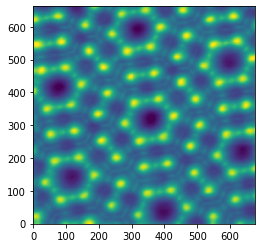

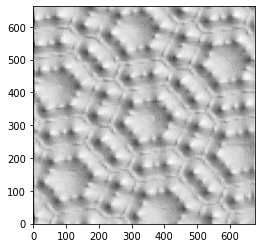

In [32]:
# convert to radians
theta = 20*np.pi/180
phi = 30*np.pi/180

# known formulas for converting from polar coordinates to cartesian coordinates
a_x = np.cos(theta)*np.cos(phi)
a_y = np.cos(theta)*np.sin(phi)
a_z = np.sin(theta)

# load stm data
w = np.loadtxt("stm.txt")

# np.gradient returns the directional derivatives as (d/dy, d/dx)
dwdy, dwdx = np.gradient(w, 2.5)

# use formula from above
I = (-a_x*dwdx - a_y*dwdy + a_z)/(np.sqrt(dwdx**2 + dwdy**2) + 1)

# compare raw data with data after the light source has been "shone" on it
plt.imshow(w, origin = 'lower')
plt.show()
plt.imshow(I, cmap = 'gray', origin = 'lower')
plt.show()